### 프로젝트 1 - 손수 설계하는 선형회귀

### 1-1. 데이터 가져오기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

df_X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].values
df_y = df['target'].values

### 1-2. 모델에 입력할 데이터 X,y 준비 및 train, test 분리

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(df_X)
y = np.array(df_y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

W = np.random.rand(10)
b = np.random.rand()

### 1-3. 모델준비

In [5]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    N = len(W)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [6]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.44720581  -13.6857186  -189.60505079 -142.56512258  -68.16968195
  -55.94113558  127.71396813 -138.99953266 -182.79529909 -123.39939772]
db: -303.1457593860898


### 1-4 학습률 설정 및 학습

In [10]:
LEARNING_RATE = 0.1

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2922.4728
Iteration 20 : Loss 2914.9971
Iteration 30 : Loss 2909.5826
Iteration 40 : Loss 2905.6404
Iteration 50 : Loss 2902.7552
Iteration 60 : Loss 2900.6325
Iteration 70 : Loss 2899.0629
Iteration 80 : Loss 2897.8963
Iteration 90 : Loss 2897.0247
Iteration 100 : Loss 2896.3700
Iteration 110 : Loss 2895.8755
Iteration 120 : Loss 2895.4996
Iteration 130 : Loss 2895.2118
Iteration 140 : Loss 2894.9896
Iteration 150 : Loss 2894.8164
Iteration 160 : Loss 2894.6795
Iteration 170 : Loss 2894.5697
Iteration 180 : Loss 2894.4799
Iteration 190 : Loss 2894.4049
Iteration 200 : Loss 2894.3407
Iteration 210 : Loss 2894.2842
Iteration 220 : Loss 2894.2331
Iteration 230 : Loss 2894.1857
Iteration 240 : Loss 2894.1407
Iteration 250 : Loss 2894.0971
Iteration 260 : Loss 2894.0541
Iteration 270 : Loss 2894.0113
Iteration 280 : Loss 2893.9682
Iteration 290 : Loss 2893.9246
Iteration 300 : Loss 2893.8803
Iteration 310 : Loss 2893.8351
Iteration 320 : Loss 2893.7890
Iteration 330 : L

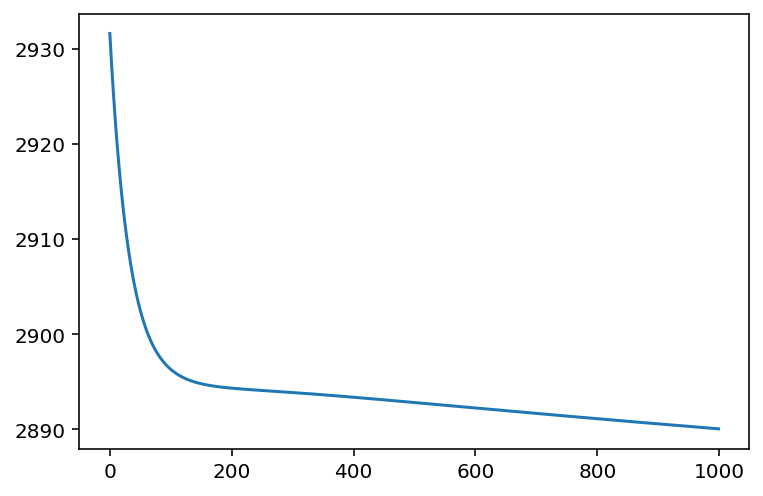

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(losses)
plt.show()

### 3-1. 모델 테스트

In [12]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2885.6179548115406

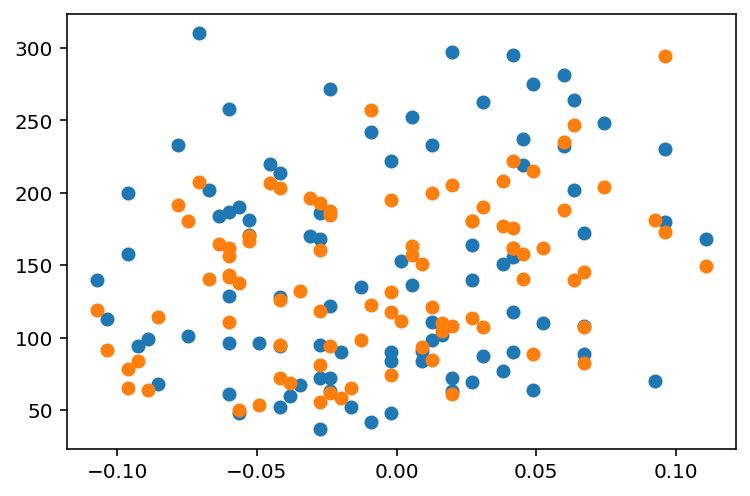

In [13]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

### 프로젝트 2 - 날씨 좋은 월요일 오후 세시...

### 2-1. 데이터 가져오기

In [14]:
import os
import seaborn as sns
import pandas as pd

#데이터 가져오기
df= pd.read_csv('//home//aiffel0043//aiffel//bike-sharing-demand//train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### 2-2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [15]:
df['Year'] = pd.DatetimeIndex(df['datetime']).year
df['Month'] = pd.DatetimeIndex(df['datetime']).month
df['Day'] = pd.DatetimeIndex(df['datetime']).day
df['Hour'] = pd.DatetimeIndex(df['datetime']).hour
df['Minute'] = pd.DatetimeIndex(df['datetime']).minute
df['Second'] = pd.DatetimeIndex(df['datetime']).second

X = df[ ["Year", "Month", "Day", "Hour", "Minute", "Second"] ]
y = df['count'].values

### 2-3. year, month, day, hour, minute, second 데이터 개수 시각화하기

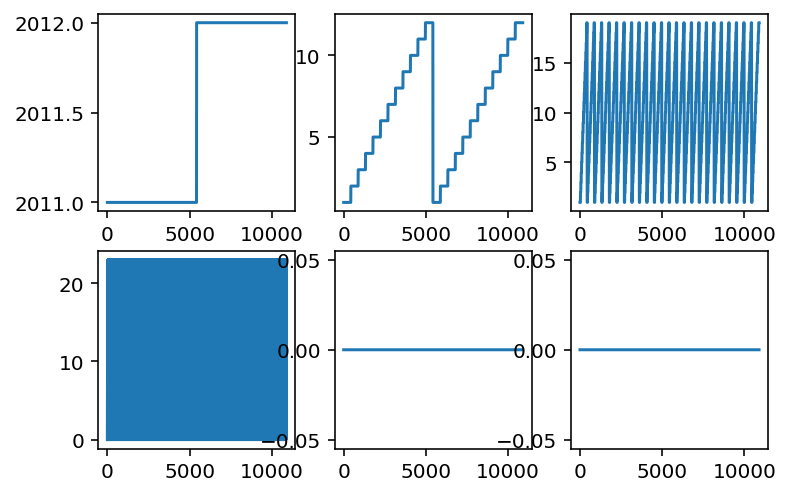

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

x1 = sns.countplot(x="Year", data=df)

x2 = sns.countplot(x="Month", data=df)

x3 = sns.countplot(x="Day", data=df)

x4 = sns.countplot(x="Hour", data=df)

x5 = sns.countplot(x="Minute", data=df)

x6 = sns.countplot(x="Second", data=df)

plt.subplot(2,3,1)
plt.plot(df["Year"])
plt.subplot(2,3,2)
plt.plot(df["Month"])
plt.subplot(2,3,3)
plt.plot(df["Day"])
plt.subplot(2,3,4)
plt.plot(df["Hour"])
plt.subplot(2,3,5)
plt.plot(df["Minute"])
plt.subplot(2,3,6)
plt.plot(df["Second"])


### 2-4. X, y 컬럼 선택 및 train/test 데이터 분리 및 학습

In [17]:
# train, test데이터 분리
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

W = np.random.rand(6)
b = np.random.rand()

# 선형회귀 모델 사용
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 2-5. 데이터 예측

In [20]:
# X데이터에 대한 데이터 예측
predictions = model.predict(X_test)
print(predictions)

#MSE를 이용하여 예측
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(mse)

#RMSE를 이용하여 예측
rmse = np.sqrt(mse)
print(rmse)

[146.5551082  132.93013344 262.21829819 ... 302.50868933 115.64227952
 242.69690356]
24495.538843501945
156.5105071345114


### 2-6. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

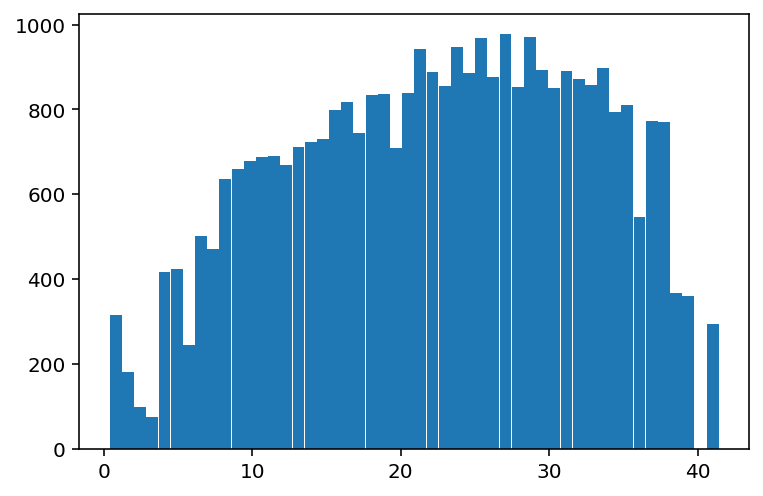

In [21]:
plt.figure()
plt.bar(df["temp"], df["count"])
plt.show()

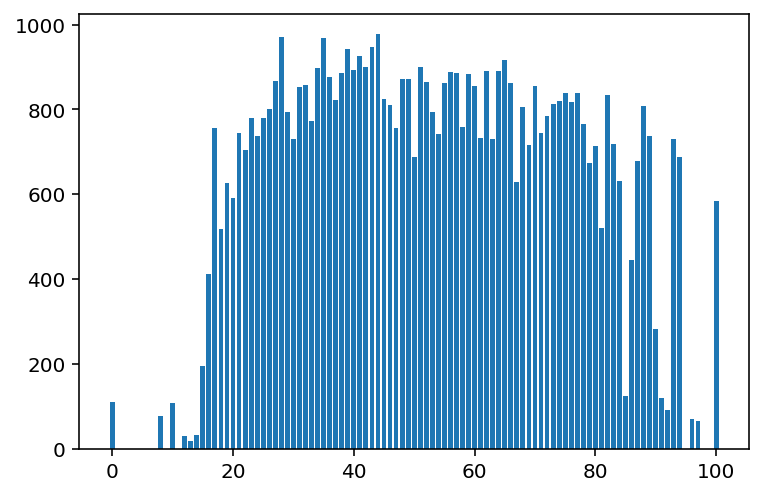

In [22]:
plt.figure()
plt.bar(df["humidity"], df["count"])
plt.show()

In [23]:
# 본 노드를 진행하며, 시각화 하는 부분이 부족하다는 것을 느꼈으며, 그로 인해 이 부분을 더 공부해야겠다고, 생각했습니다.